<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#EJI = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Delaware.csv?raw=true")

In [4]:
#EJI.head()

In [5]:
#EJI_loc = EJI.loc[:, ['Location', 'E_IMPWTR']]
#EJI_loc.sort_values(by='E_IMPWTR')

In [57]:
#reads in csv file for 'Condition of Non-Tidal Wetlands'
nontidal = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Condition_of_Non-Tidal_Wetlands_20241009.csv?raw=true")
#specifies usable columns from dataframe
ntid = nontidal.loc[:, ['Date', 'Sub-watershed', 'QDR']]

#reads in csv file for 'Condition of Tidal Wetlands'
tidal = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Condition_of_Tidal_Wetlands_20241009.csv?raw=true")
#rename Final Score column to Total Score to align the datasets
tidal = tidal.rename(columns={'Final score': 'Total Score'})
#add empty QCR column to align the datasets
tidal['QCR'] = pd.Series(dtype='int')
#specifies usable columns from dataframe
tid = tidal.loc[:, ['Date', 'Sub-watershed', 'QDR']]

In [77]:
#reads in csv file of nitrogen levels for Station 114051, Trib Army Creek
station_114051 = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/station-114051.csv?raw=true")
#specifies usable columns
nit_tac = station_114051.loc[:, ['timestamp', 'nutrient_nitrogen_value']]
#adds a datetime object
nit_tac['timestamp'] = pd.to_datetime(nit_tac.timestamp)
#removes dates outside of the timeframe of analysis
start_date = '2017-05-24'
end_date = '2017-10-03'
timeframe = (nit_tac['timestamp'] > start_date) & (nit_tac['timestamp'] <= end_date)
nit_tac = nit_tac.loc[timeframe]

#locating Trib Army Creek
ntid_tac = ntid[ntid['Sub-watershed'].str.contains('Army Creek', na=False)]
tid_tac = tid[tid['Sub-watershed'].str.contains('Army Creek', na=False)]
#combining Trib Army Creek datasets
tac = pd.concat([ntid_tac, tid_tac], ignore_index=True, sort=False)
tac = tac.loc[:, ['Date', 'QDR']]
#adds a datetime object and sort by date
tac['Date'] = pd.to_datetime(tac.Date)
tac = tac.sort_values(by='Date')

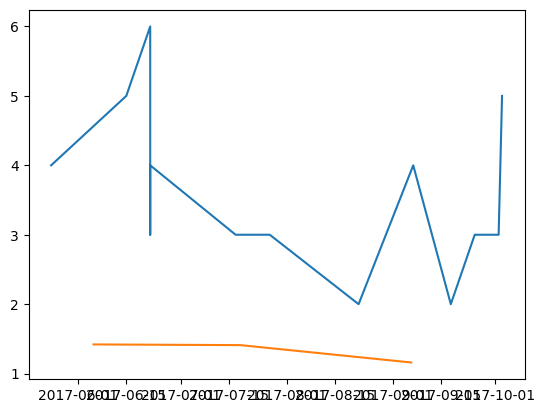

In [75]:
plt.plot(tac['Date'], tac['QDR'])
plt.plot(nit_tac['timestamp'], nit_tac['nutrient_nitrogen_value'])

In [82]:
#reads in csv file of nitrogen levels for Station 105171, White Clay Creek
station_105171 = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/station-105171.csv?raw=true")
#specifies usable columns
nit_wcc = station_105171.loc[:, ['timestamp', 'nutrient_nitrogen_value']]
#adds a datetime object
nit_wcc['timestamp'] = pd.to_datetime(nit_wcc.timestamp)
#removes dates outside of the timeframe of analysis
start_date = '2019-07-16'
end_date = '2019-09-05'
timeframe = (nit_wcc['timestamp'] > start_date) & (nit_wcc['timestamp'] <= end_date)
nit_wcc = nit_wcc.loc[timeframe]

#locating Deep Creek
ntid_wcc = ntid[ntid['Sub-watershed'].str.contains('White Clay Creek', na=False)]
tid_wcc = tid[tid['Sub-watershed'].str.contains('White Clay Creek', na=False)]
#combining Deep Creek datasets
wcc = pd.concat([ntid_wcc, tid_wcc], ignore_index=True, sort=False)
wcc = dc.loc[:, ['Date', 'QDR']]
#adds a datetime object and sort by date
wcc['Date'] = pd.to_datetime(wcc.Date)
wcc = wcc.sort_values(by='Date')

wcc

,Date,QDR
18,2019-06-17,3.0
12,2019-06-17,4.0
0,2019-06-18,5.0
21,2019-06-18,3.0
14,2019-06-18,3.0
4,2019-06-18,2.0
5,2019-06-26,5.0
1,2019-06-26,2.0
36,2019-06-26,4.0
15,2019-06-26,3.0


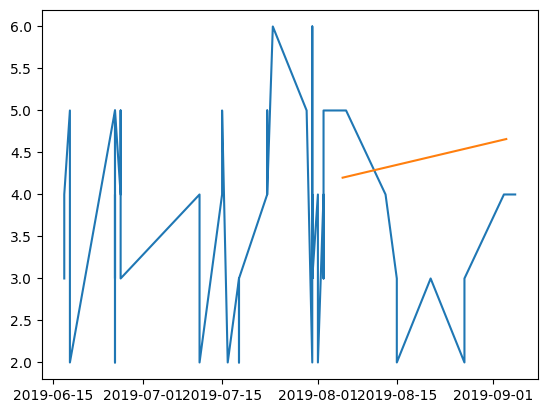

In [83]:
plt.plot(wcc['Date'], wcc['QDR'])
plt.plot(nit_wcc['timestamp'], nit_wcc['nutrient_nitrogen_value'])